In [1]:
import sys
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
import sklearn

print("Python:", sys.version.splitlines()[0])
print("pandas:", pd.__version__)
print("numpy:", np.__version__)
print("matplotlib:", matplotlib.__version__)
print("seaborn:", sns.__version__)
print("sklearn:", sklearn.__version__)

Python: 3.13.7 (tags/v3.13.7:bcee1c3, Aug 14 2025, 14:15:11) [MSC v.1944 64 bit (AMD64)]
pandas: 2.3.2
numpy: 2.3.2
matplotlib: 3.10.6
seaborn: 0.13.2
sklearn: 1.7.2


In [2]:
# Standard imports
import os
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, classification_report, mean_absolute_error


sns.set(style="whitegrid", context="notebook")     
plt.rcParams['figure.figsize'] = (10, 5)
plt.rcParams['savefig.dpi'] = 150
RANDOM_SEED = 42

In [3]:
df= pd.read_csv ("Final_data.csv")
df.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,...,cal_from_macros,pct_carbs,protein_per_kg,pct_HRR,pct_maxHR,cal_balance,lean_mass_kg,expected_burn,Burns Calories (per 30 min)_bc,Burns_Calories_Bin
0,34.91,Male,65.27,1.62,188.58,157.65,69.05,1.00,1080.90,Strength,...,2139.59,0.500432,1.624789,0.741237,0.835985,725.10,47.777394,685.1600,7.260425e+19,Medium
1,23.37,Female,56.41,1.55,179.43,131.75,73.18,1.37,1809.91,HIIT,...,1711.65,0.500850,1.514093,0.551247,0.734270,-232.91,40.809803,978.6184,1.020506e+20,High
2,33.20,Female,58.98,1.67,175.04,123.95,54.96,0.91,802.26,Cardio,...,1965.92,0.500610,1.663445,0.574534,0.708124,805.74,44.635580,654.5266,1.079607e+20,High
3,38.69,Female,93.78,1.70,191.21,155.10,50.07,1.10,1450.79,HIIT,...,1627.28,0.499533,0.862017,0.744155,0.811150,1206.21,63.007432,773.6300,8.987921e+19,High
4,45.09,Male,52.42,1.88,193.58,152.88,70.84,1.08,1166.40,Strength,...,2659.23,0.500581,2.538153,0.668405,0.789751,303.60,43.347504,711.4176,5.264685e+19,Low


In [4]:
def overview(df):
    display(df.head())
    print("\nShape:",df.shape)
    print("\nDtypes:")
    print(df.dtypes)
    print("\nMissing values (count):")
    print(df.isnull().sum().sort_values(ascending=False).head(20))
overview(df)

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,...,cal_from_macros,pct_carbs,protein_per_kg,pct_HRR,pct_maxHR,cal_balance,lean_mass_kg,expected_burn,Burns Calories (per 30 min)_bc,Burns_Calories_Bin
0,34.91,Male,65.27,1.62,188.58,157.65,69.05,1.00,1080.90,Strength,...,2139.59,0.500432,1.624789,0.741237,0.835985,725.10,47.777394,685.1600,7.260425e+19,Medium
1,23.37,Female,56.41,1.55,179.43,131.75,73.18,1.37,1809.91,HIIT,...,1711.65,0.500850,1.514093,0.551247,0.734270,-232.91,40.809803,978.6184,1.020506e+20,High
2,33.20,Female,58.98,1.67,175.04,123.95,54.96,0.91,802.26,Cardio,...,1965.92,0.500610,1.663445,0.574534,0.708124,805.74,44.635580,654.5266,1.079607e+20,High
3,38.69,Female,93.78,1.70,191.21,155.10,50.07,1.10,1450.79,HIIT,...,1627.28,0.499533,0.862017,0.744155,0.811150,1206.21,63.007432,773.6300,8.987921e+19,High
4,45.09,Male,52.42,1.88,193.58,152.88,70.84,1.08,1166.40,Strength,...,2659.23,0.500581,2.538153,0.668405,0.789751,303.60,43.347504,711.4176,5.264685e+19,Low



Shape: (20000, 54)

Dtypes:
Age                               float64
Gender                             object
Weight (kg)                       float64
Height (m)                        float64
Max_BPM                           float64
Avg_BPM                           float64
Resting_BPM                       float64
Session_Duration (hours)          float64
Calories_Burned                   float64
Workout_Type                       object
Fat_Percentage                    float64
Water_Intake (liters)             float64
Workout_Frequency (days/week)     float64
Experience_Level                  float64
BMI                               float64
Daily meals frequency             float64
Physical exercise                 float64
Carbs                             float64
Proteins                          float64
Fats                              float64
Calories                          float64
meal_name                          object
meal_type                          object
diet_

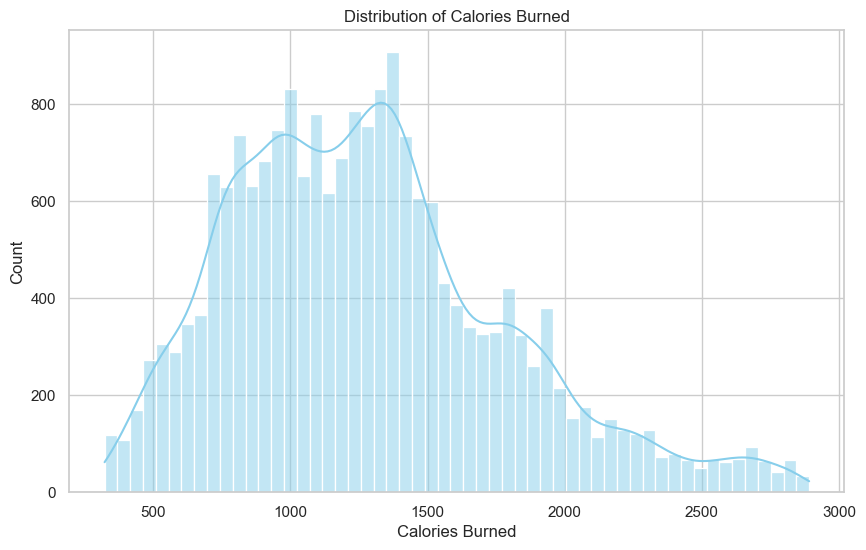

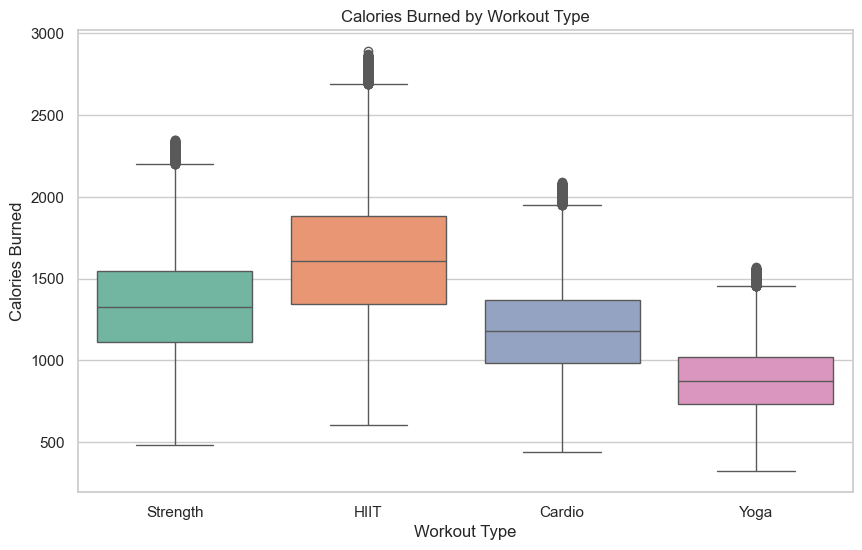

In [5]:
plt.figure(figsize=(10,6))
sns.histplot(df['Calories_Burned'],kde=True,color='skyblue')
plt.title("Distribution of Calories Burned")
plt.xlabel("Calories Burned")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(x='Workout_Type',y='Calories_Burned',data=df,palette='Set2')
plt.title("Calories Burned by Workout Type")
plt.xlabel("Workout Type")
plt.ylabel("Calories Burned")
plt.show()

<Axes: xlabel='Workout_Type', ylabel='count'>

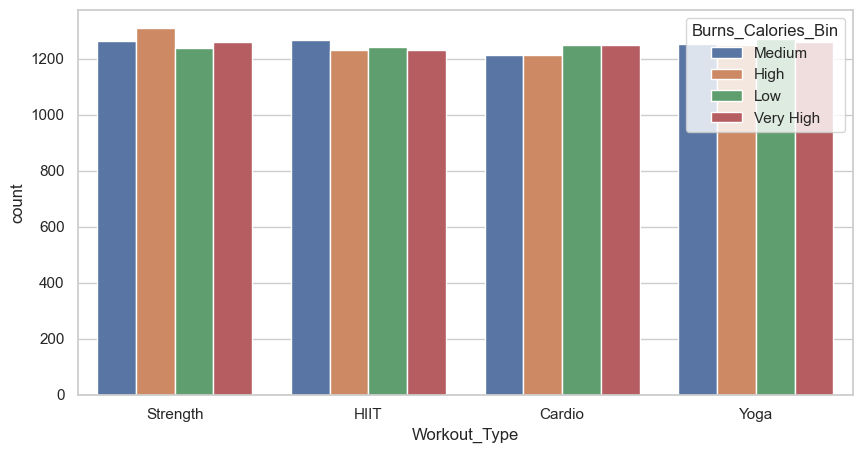

In [6]:
sns.countplot(x='Workout_Type',hue="Burns_Calories_Bin",data=df)

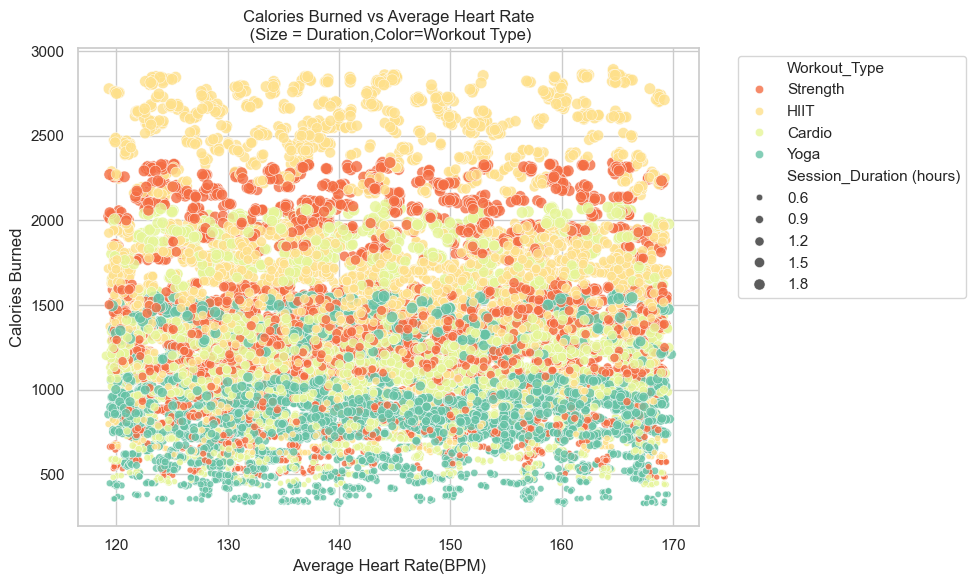

In [7]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    x='Avg_BPM',
    y='Calories_Burned',
    hue='Workout_Type',
    size='Session_Duration (hours)',
    data=df,
    alpha=0.8,
    palette='Spectral')
plt.title("Calories Burned vs Average Heart Rate\n (Size = Duration,Color=Workout Type)")
plt.xlabel("Average Heart Rate(BPM)")
plt.ylabel("Calories Burned")
plt.legend(bbox_to_anchor=(1.05,1),loc='upper left')
plt.tight_layout()
plt.show()

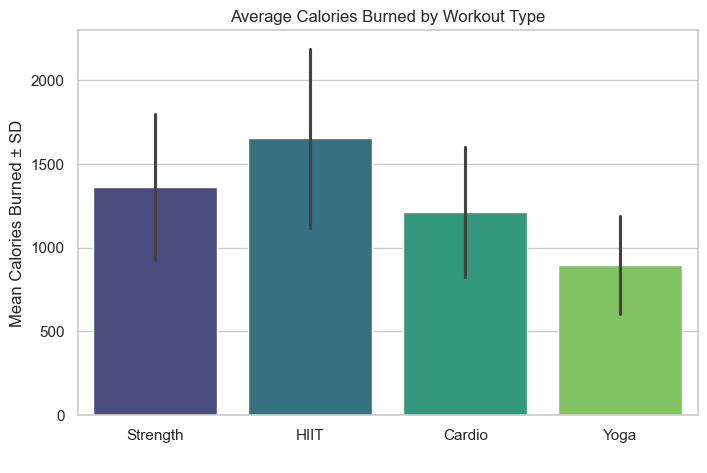

In [8]:
plt.figure(figsize=(8,5))
sns.barplot(x="Workout_Type",y="Calories_Burned",data=df,estimator='mean',ci='sd',palette='viridis')
plt.title("Average Calories Burned by Workout Type")
plt.ylabel("Mean Calories Burned ± SD")
plt.xlabel(" ")
plt.show()

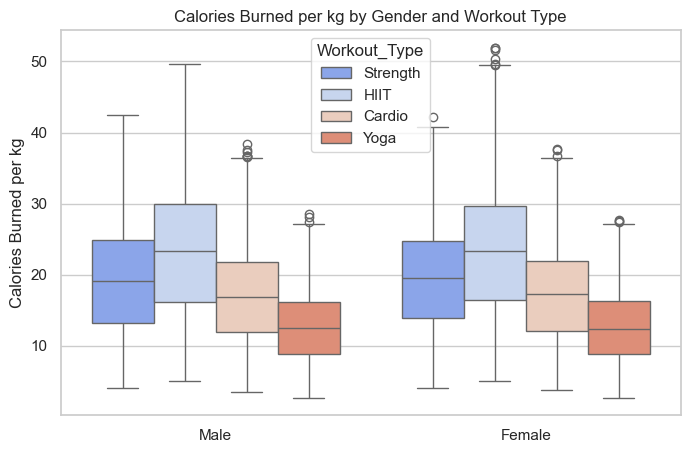

In [9]:
df['Calories_per_kg']=df['Calories_Burned']/df['Weight (kg)']
plt.figure(figsize=(8,5))
sns.boxplot(x="Gender",y="Calories_per_kg",hue='Workout_Type',data=df,palette='coolwarm')
plt.title("Calories Burned per kg by Gender and Workout Type")
plt.xlabel(" ")
plt.ylabel("Calories Burned per kg")
plt.show()

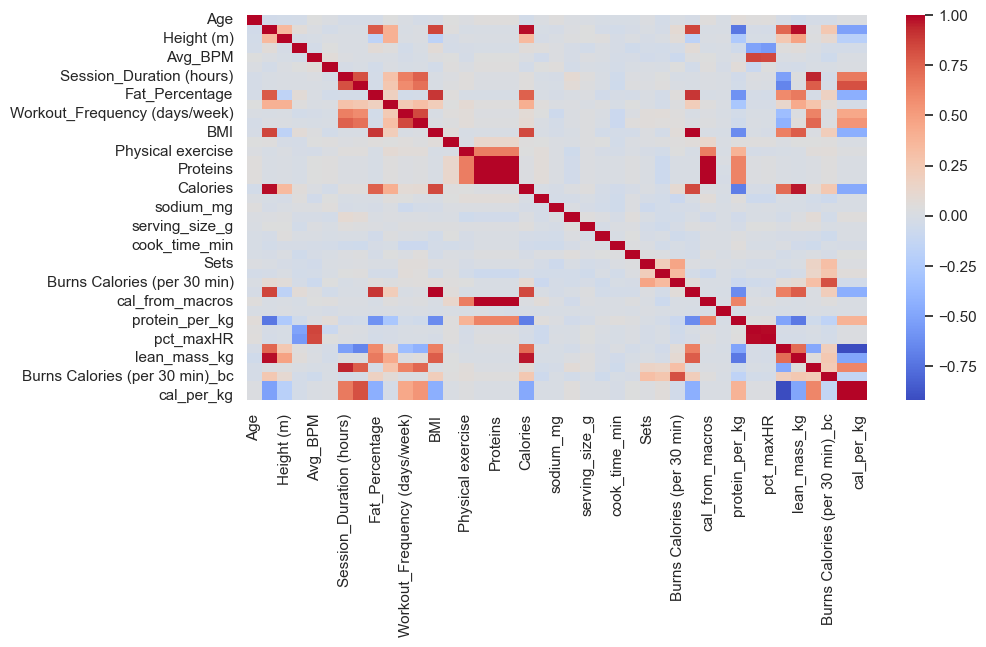

In [19]:
df["BMI"]=df["Weight (kg)"]/(df['Height (m)']**2)
df['cal_per_kg']=df['Calories_Burned']/df["Weight (kg)"]
df.corr(numeric_only=True)["Calories_Burned"].sort_values(ascending=False)
sns.heatmap(df.corr(numeric_only=True),annot=False,cmap='coolwarm')
plt.show()

In [11]:
X = df.select_dtypes(include=['float64', 'int64']).drop(columns=['Calories_Burned'])
y = df["Calories_Burned"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

pred = model.predict(X_test)
print("R²:", r2_score(y_test, pred))
print("MAE:", mean_absolute_error(y_test, pred))

R²: 0.9993176620413645
MAE: 7.202998724999993


In [18]:
X = df.select_dtypes(include=['float64','int64'])
y = df["Burns_Calories_Bin"].astype('category')

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train,y_train)

pred = model.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

        High       1.00      1.00      1.00       998
         Low       1.00      1.00      1.00       994
      Medium       1.00      1.00      1.00       970
   Very High       1.00      1.00      1.00      1038

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000



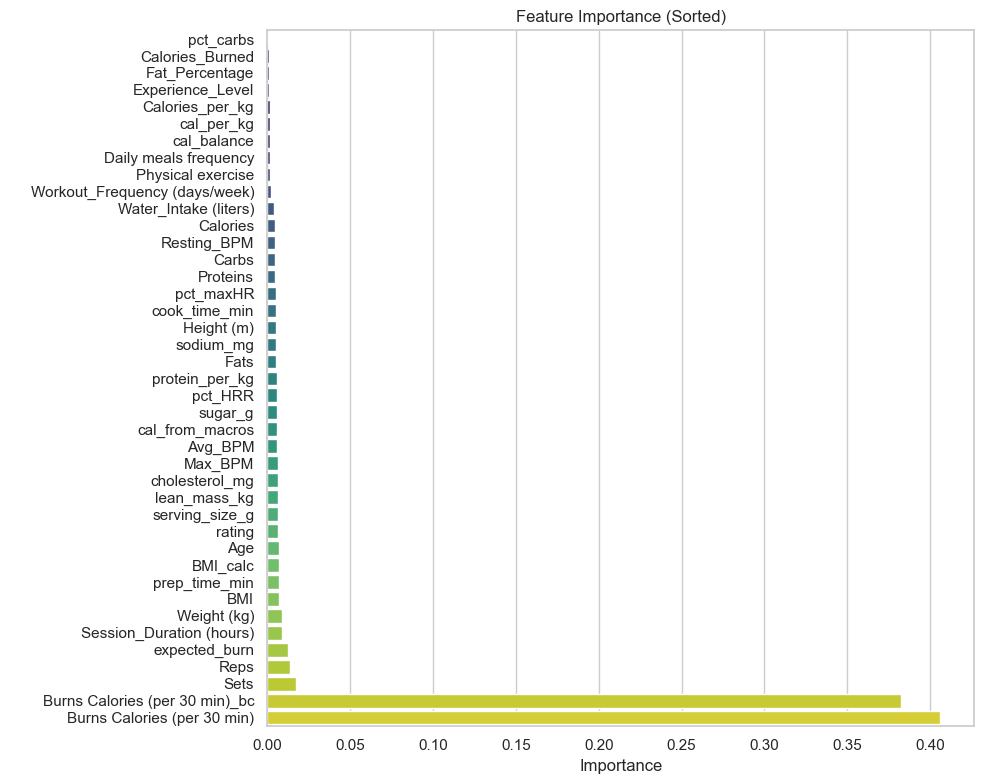

In [21]:
feat_imp = pd.DataFrame({'Feature':X.columns,'Importance':model.feature_importances_}).sort_values(by='Importance',ascending=True)

plt.figure(figsize=(10,8))
sns.barplot(x='Importance',y='Feature',data=feat_imp,palette='viridis')
plt.title("Feature Importance (Sorted)")
plt.xlabel("Importance")
plt.ylabel(" ")
plt.tight_layout()
plt.show()